In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [3]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # print(data_temp.size)
    return data_temp

In [4]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "LN" in path:
            if "Mean" in path: continue
            else: 
                data["Mode"] += "+LN"
                continue
        if "FCs" in path: 
            data["Mode"] += path.split("__FC")[1][:7]
            # continue
        if "WD" in path: continue

        if "Mean1" in path:
            data["Mode"] += "+M1"
        elif "Mean2" in path:
            data["Mode"] += "+M2"
        elif "Mean5" in path:
            data["Mode"] += "+M5"
        else:
            pass
        
        if "G11" in path and "LR1.2" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.2)"
        elif "G11" in path and "LR1.5" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.5)"
        elif "G11" in path and "LR1.0" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.0)"
        elif "G11" in path and "LR0.8" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.8)"
        elif "G11" in path and "LR0.6" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.6)"
        elif "G11" in path and "LR0.3" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.3)"
        elif "G11" in path: continue

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

/tmp/ipykernel_2164021/1559213182.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)


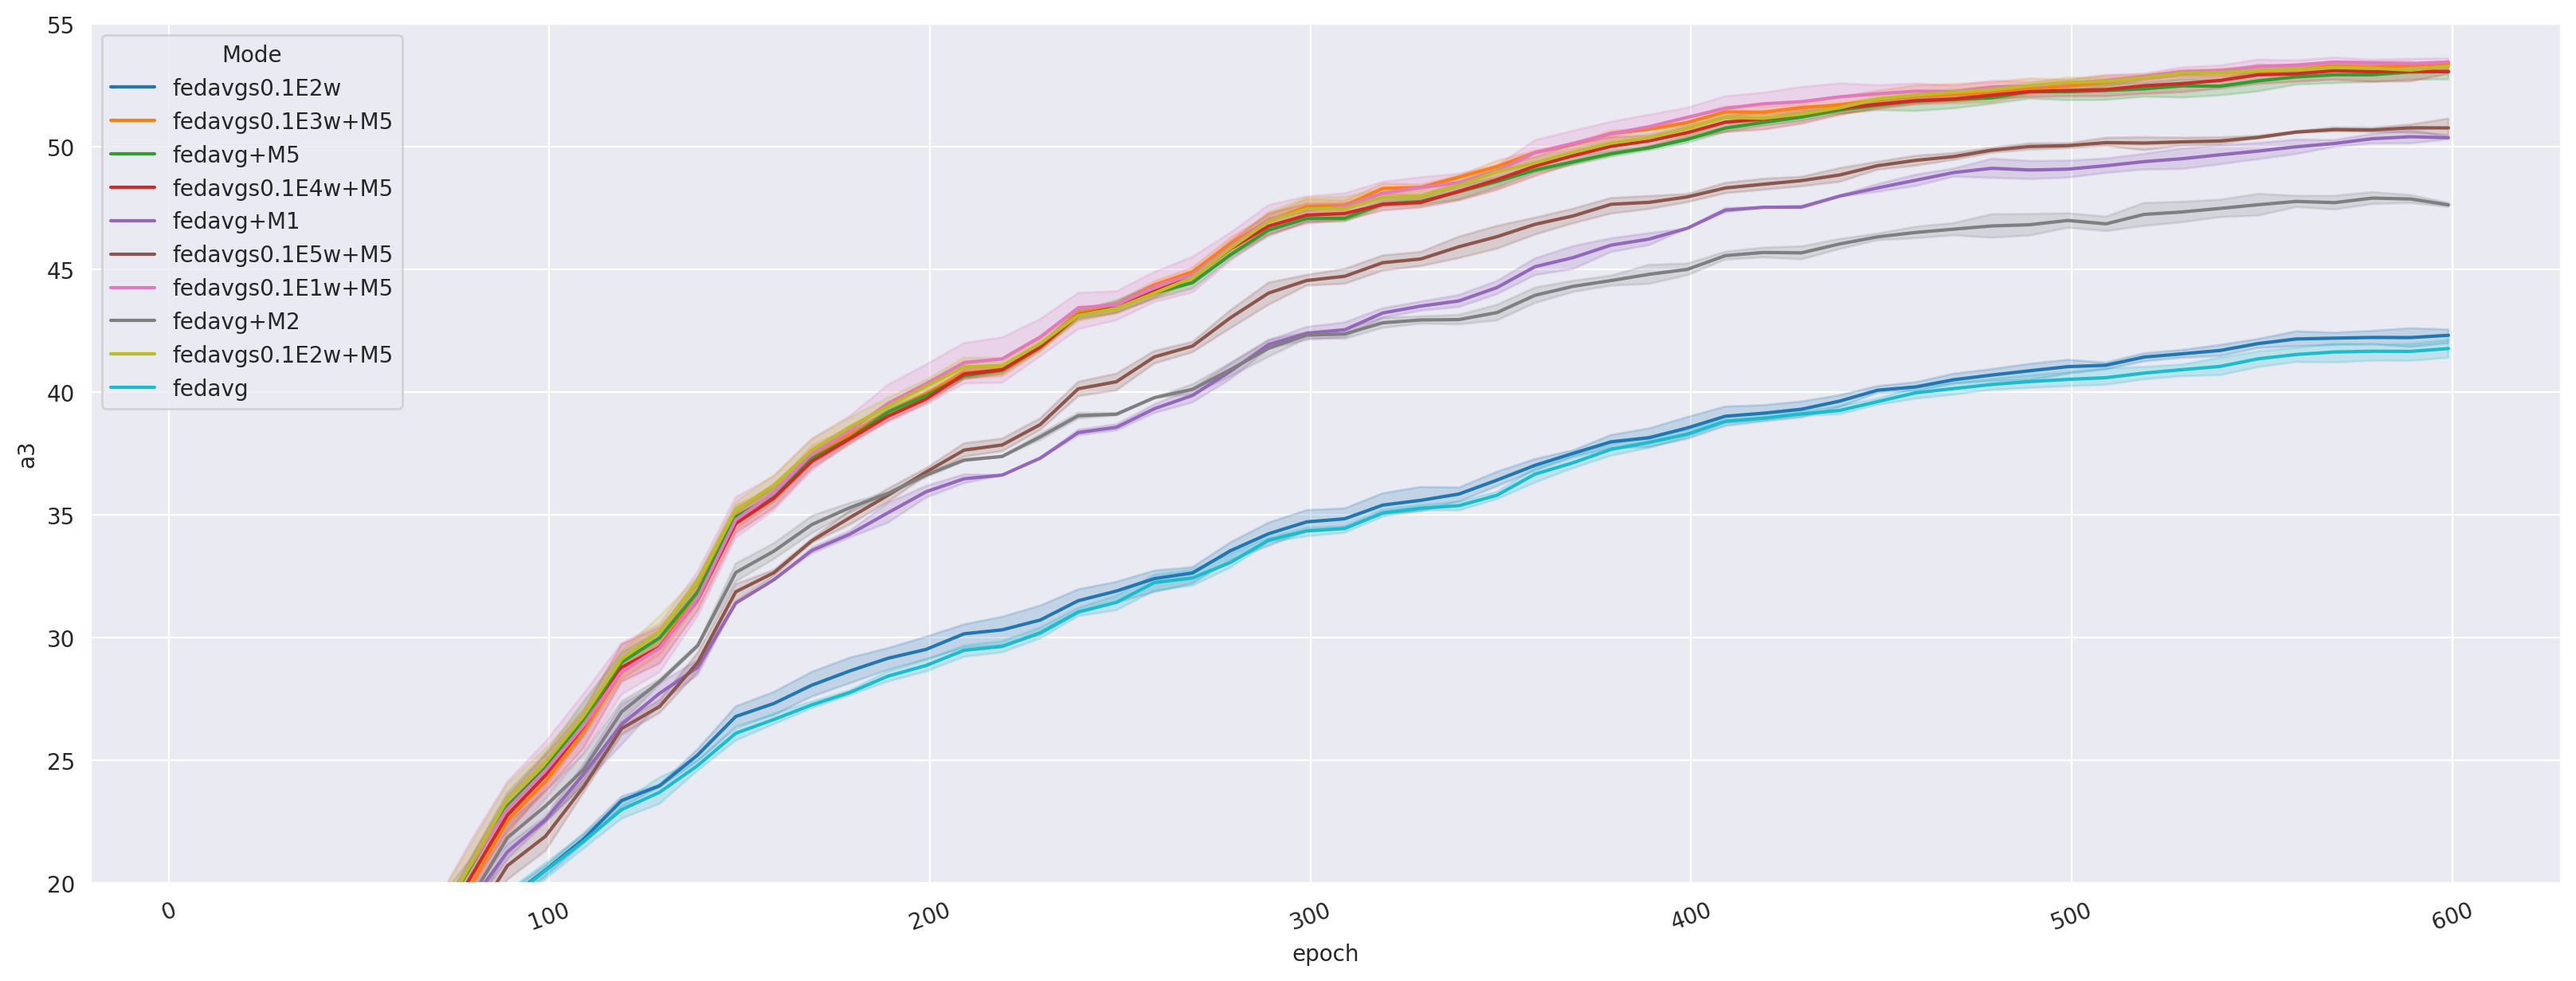

In [11]:
data_temp = load_data("../Output/CIFAR100-fedavg*B0-D0*-N100-P0.01*/s[1-9].csv")
# data_temp2 = load_data("../Output/CIFAR10noBN2-fedavg*B0-D0*-N100-P0.01*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] <= 599]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", ax=ax)
    ax.set_ylim([20,55])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)

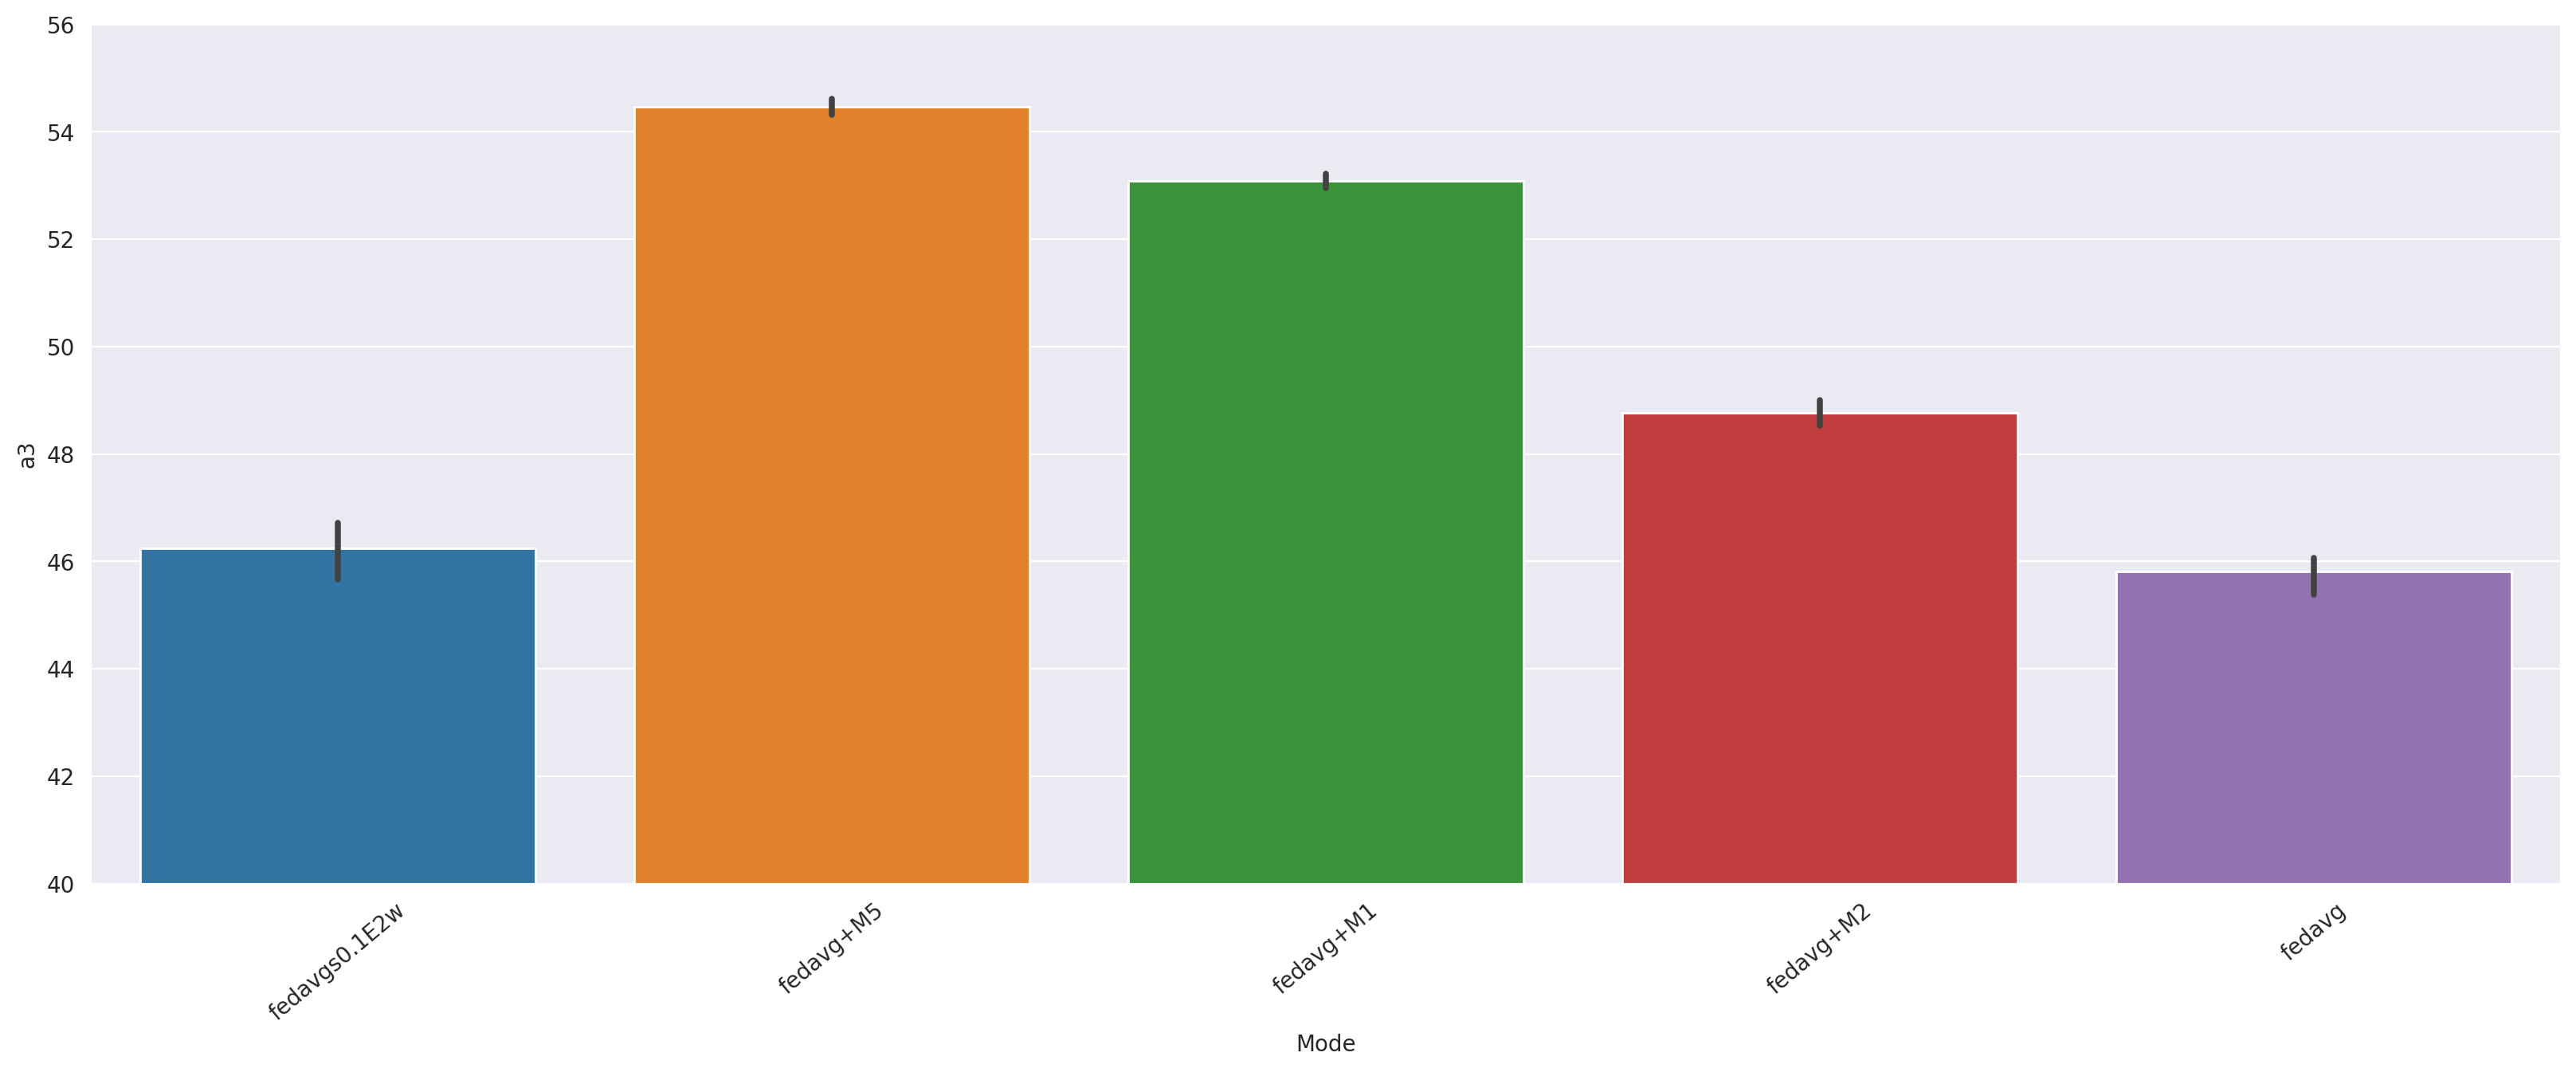

In [6]:
data_temp = load_data("../Output/CIFAR100-fedavg*B0-D0*-N100-P0.01*/s[1-9].csv")
# data_temp2 = load_data("../Output/CIFAR10noBN2-fedavg*B0-D0*-N100-P0.01*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 999]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax)
    ax.set_ylim([40,56])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)

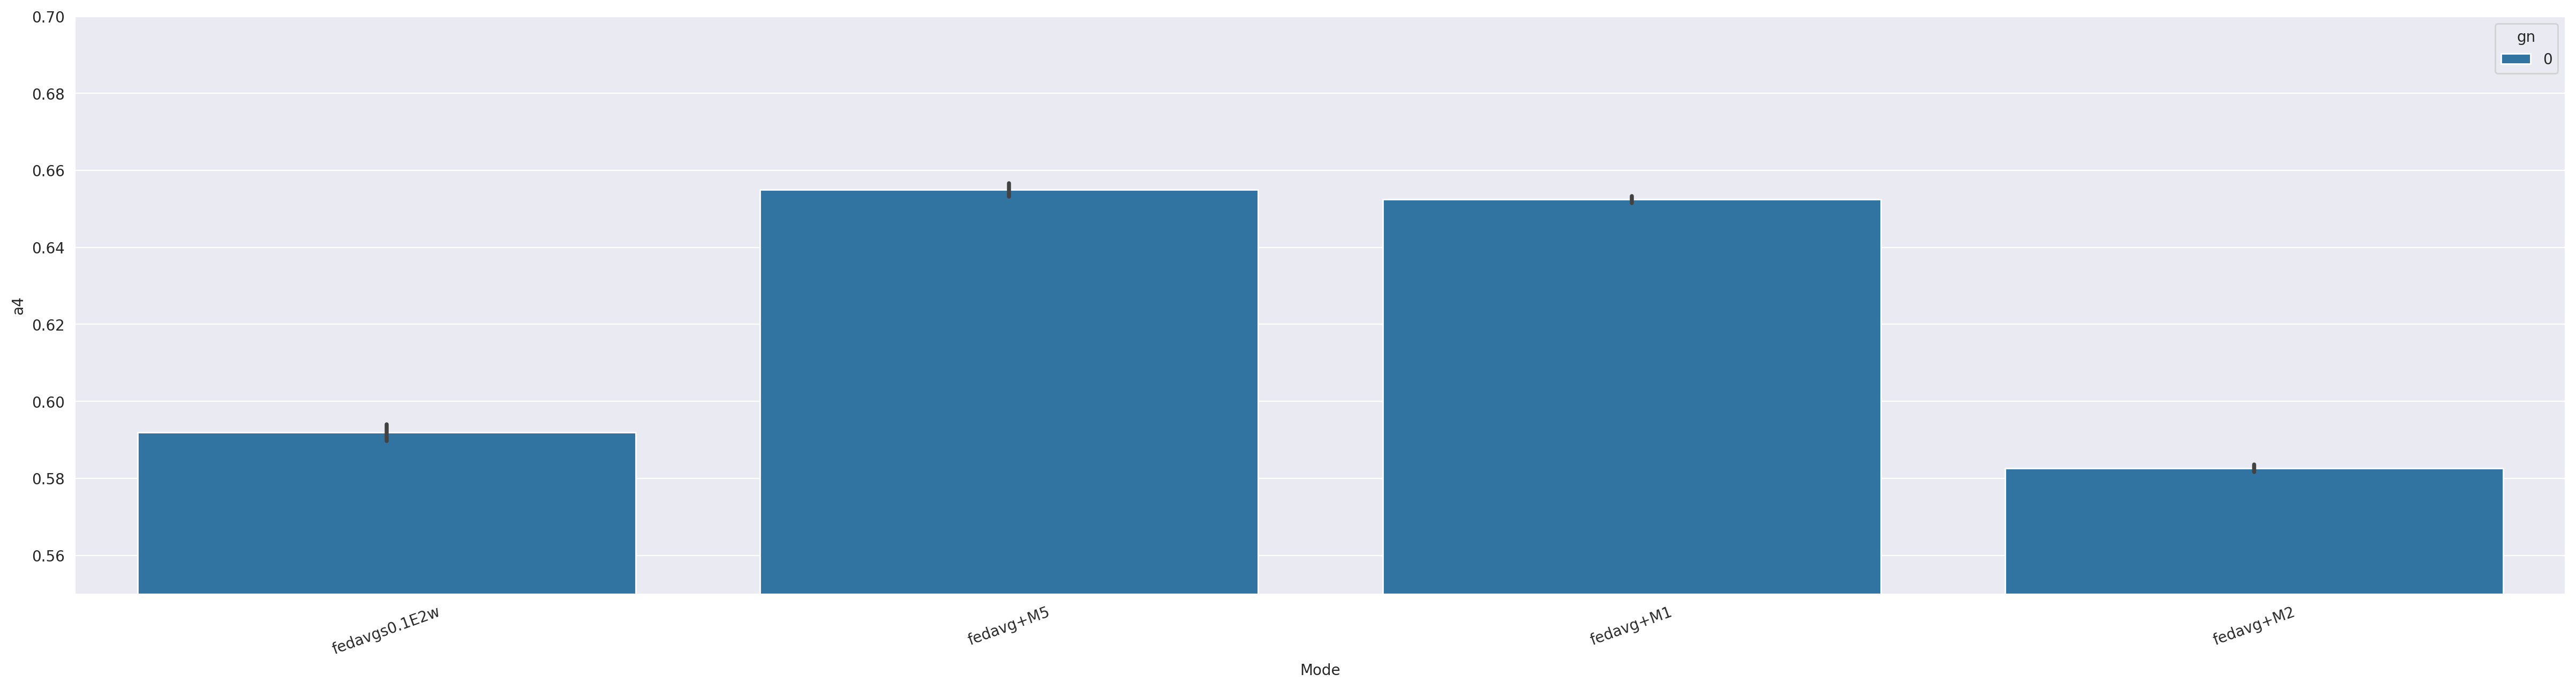

In [7]:
data_temp = load_data("../Output/CIFAR100-fedavg*B0-D0*-N100-P0.01*/s[1-9].csv")
# data_temp2 = load_data("../Output/CIFAR10noBN2-fedavg*B0-D0*-N100-P0.01*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(30,7), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    # temp = temp[(temp["epoch"] == 299) | (temp["epoch"] == 599) | (temp["epoch"] == 799) | (temp["epoch"] == 999)]
    temp = temp[(temp["epoch"] == 999)]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddyn") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    temp = temp[(temp["Mode"] != "fedavg") & (temp["Mode"] != "fedavg_PCOS1")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a4", hue="gn", ax=ax)
    ax.set_ylim([0.55,0.70])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
    for txt in ax.get_xticklabels():
        if "e3" in txt.get_text(): txt.set_fontweight('bold')
        if "e4" in txt.get_text(): txt.set_fontweight('bold')
        if "e5" in txt.get_text(): txt.set_fontweight('bold')
        if "PCOS" in txt.get_text(): txt.set_color("red")
# print(ax.get_xticklabels())

In [8]:
temp[temp["Mode"] == "fedavgMean5_s01e3_w1"]

,Unnamed: 0,task,mode,gn,balance,distribution,n_clients,act_prob,seed,epoch,a1,a2,a3,a4,l1,l2,l3,l4,Mode,Distribution
